In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# 1. The Website URL (Flipkart Laptops)
url = "https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"

# 2. The "Mask" (User-Agent)
# This pretends we are a real Mac user so Flipkart doesn't block us.
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9'
}

# 3. Connect to the website
print("Connecting to Flipkart...")
response = requests.get(url, headers=headers)

# 4. Check the result
print("Status Code:", response.status_code)

Connecting to Flipkart...
Status Code: 200


In [2]:
%pip install requests beautifulsoup4 pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 375.4 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 349.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12/12 [beautifulsoup4]m [pandas]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
# 1. Turn the messy HTML into a structured "Soup" object
soup = BeautifulSoup(response.content, 'html.parser')

# 2. Find all the "Product Cards"
# Note: Flipkart changes class names often. 'tUxRFH' is the current common class for product cards.
products = soup.find_all('div', class_='jIjQ8S')

# 3. Count how many we found
print(f"Found {len(products)} laptops on this page.")

Found 24 laptops on this page.


In [9]:
# Let's look at just the FIRST laptop to test our code
first_laptop = products[0]

# 1. Attempt to find Name (Try class 'KzDlHZ' or inspect for new one)
name_tag = first_laptop.find('div', class_='RG5Slk')
name = name_tag.text if name_tag else "Name Not Found"

# 2. Attempt to find Price (Try class 'Nx9bqj _4b5DiR' or inspect for new one)
price_tag = first_laptop.find('div', class_='hZ3P6w DeU9vF')
price = price_tag.text if price_tag else "Price Not Found"

# 3. Attempt to find the List of Specs (Usually an unordered list <ul>)
specs_tag = first_laptop.find('ul')
specs = specs_tag.text if specs_tag else "Specs Not Found"

print("--- LAPTOP 1 ---")
print("Name:", name)
print("Price:", price)
print("Specs:", specs)

--- LAPTOP 1 ---
Name: HP MSO 2024 Intel Core i3 13th Gen 1315U - (16 GB/512 GB SSD/Windows 11 Home) 15-fd0574TU / 15 - fd066...
Price: ₹40,990
Specs: Intel Core i3 Processor (13th Gen)16 GB DDR4 RAMWindows 11 Home Operating System512 GB SSD39.62 cm (15.6 Inch) DisplayMS Office Home 2024 + MISC PC Game Pass DA 3M1 Year Onsite Warranty


In [14]:
laptop_data = []

# Loop through each laptop "card" (using your new class 'jIjQ8S')
for item in products:
    # 1. Get Name
    # We look inside the current 'item' to find the Name
    name_tag = item.find('div', class_='RG5Slk')
    name = name_tag.text if name_tag else "None"
    
    # 2. Get Price
    price_tag = item.find('div', class_='hZ3P6w DeU9vF') 
    price = price_tag.text if price_tag else "None"
    
    # 3. Get Specs (The detailed list)
    ul_tag = item.find('ul')
    if ul_tag:
        bullets = ul_tag.find_all('li')
        # Join them into one string separated by commas
        specs = ", ".join([b.text for b in bullets])
    else:
        specs = "None"
    
    # 4. Add to our dataset
    laptop_data.append({
        'Name': name,
        'Price': price,
        'Specs': specs
    })

# Convert to a DataFrame (The Table)
df = pd.DataFrame(laptop_data)

# Show the first 5 rows to verify
print("Scraping Successful!")
df.head()

Scraping Successful!


,Name,Price,Specs
0,HP MSO 2024 Intel Core i3 13th Gen 1315U - (16...,"₹40,990","Intel Core i3 Processor (13th Gen), 16 GB DDR4..."
1,HP Intel Core i7 13th Gen 13620H - (16 GB/512 ...,"₹66,990","Intel Core i7 Processor (13th Gen), 16 GB DDR4..."
2,ASUS Vivobook 15 (2025) with Office 2024 + M36...,"₹45,990","Intel Core i5 Processor (13th Gen), 16 GB DDR4..."
3,ASUS Vivobook Go 15 (2025) with Office 2024 + ...,"₹39,990","Intel Core i3 Processor, 8 GB DDR4 RAM, Window..."
4,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,"₹23,590","Intel Celeron Dual Core Processor, 8 GB DDR4 R..."


In [26]:
import time

final_data = []

# Loop from Page 1 to Page 10
for page_number in range(1, 11):
    print(f"Scraping Page {page_number}...")
    
    # 1. Update the URL to change the page number
    current_url = f"https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={page_number}"
    
    # 2. Connect
    response = requests.get(current_url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # 3. Find laptops (Using YOUR correct class name)
    products = soup.find_all('div', class_='jIjQ8S') 
    
    # 4. Extract info from each laptop on this page
    for item in products:
        # Name
        name_tag = item.find('div', class_='RG5Slk')
        name = name_tag.text if name_tag else "None"
        
        # Price
        price_tag = item.find('div', class_='hZ3P6w DeU9vF')
        price = price_tag.text if price_tag else "None"
        
        # Specs
        ul_tag = item.find('ul')
        if ul_tag:
            bullets = ul_tag.find_all('li')
            specs = ", ".join([b.text for b in bullets])
        else:
            specs = "None"
        
        final_data.append({
            'Name': name,
            'Price': price,
            'Specs': specs
        })
    
    # 5. Wait 2 seconds (Crucial to avoid getting banned)
    time.sleep(2)

# Save everything to a big table
df_final = pd.DataFrame(final_data)

print(f"Mission Complete! Scraped {len(df_final)} laptops.")
df_final.head(10)

Scraping Page 1...
Scraping Page 2...
Scraping Page 3...
Scraping Page 4...
Scraping Page 5...
Scraping Page 6...
Scraping Page 7...
Scraping Page 8...
Scraping Page 9...
Scraping Page 10...
Mission Complete! Scraped 240 laptops.


,Name,Price,Specs
0,HP MSO 2024 Intel Core i3 13th Gen 1315U - (16...,"₹40,990","Intel Core i3 Processor (13th Gen), 16 GB DDR4..."
1,HP Intel Core i7 13th Gen 13620H - (16 GB/512 ...,"₹66,990","Intel Core i7 Processor (13th Gen), 16 GB DDR4..."
2,ASUS Vivobook Go 15 (2025) with Office 2024 + ...,"₹39,990","Intel Core i3 Processor, 8 GB DDR4 RAM, Window..."
3,DELL 15 AMD Ryzen 5 Hexa Core 7530U - (16 GB/5...,"₹40,990","AMD Ryzen 5 Hexa Core Processor, 16 GB DDR4 RA..."
4,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,"₹23,590","Intel Celeron Dual Core Processor, 8 GB DDR4 R..."
5,MOTOROLA Motobook 60 Full Metal OLED (i5 14th ...,"₹49,990","Intel Core 5 (Series 2) Processor, 16 GB DDR5 ..."
6,Acer NITRO LITE 16 Intel Core i5 13th Gen 1342...,"₹57,990","Intel Core i5 Processor (13th Gen), 16 GB DDR5..."
7,ASUS Vivobook Go 15 AMD Ryzen 3 Quad Core 7320...,"₹32,630","AMD Ryzen 3 Quad Core Processor, 8 GB LPDDR5 R..."
8,Lenovo 100e Chromebook Gen 4 MediaTek Kompanio...,"₹11,990","MediaTek Kompanio 520 Processor, 4 GB LPDDR4X ..."
9,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,"₹21,110","Intel Celeron Dual Core Processor, 8 GB DDR4 R..."


In [27]:
# 1. The Moment of Truth: How many did we get?
row_count = len(df_final)
print(f"🎉 Moment of Truth: You scraped {row_count} laptops!")

# 2. The Safety Net: Save only if we actually have data
if row_count > 0:
    df_final.to_csv('flipkart_laptops.csv', index=False)
    print("✅ Success! Data saved to 'flipkart_laptops.csv'.")
else:
    print("❌ Something went wrong. The list is empty.")

🎉 Moment of Truth: You scraped 240 laptops!
✅ Success! Data saved to 'flipkart_laptops.csv'.


In [12]:
# 1. Remove rows where Price is "None"
df = df[df['Price'] != "None"]

# 2. Force the column to be String first (.astype(str))
# Then clean it -> Then convert to Integer
df['Price'] = df['Price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(int)

# 3. Check the result
print(f"Cleaned Rows: {len(df)}")
print(df['Price'].head())

Cleaned Rows: 240
0    40990
1    66990
2    39990
3    40990
4    23590
Name: Price, dtype: int64


In [ ]:
print(df['Price'].mean())

51864.0


In [32]:
import re # "re" stands for Regular Expressions (the tool for finding patterns in text)

# 1. Extract RAM (Look for digits followed by 'GB')
# The pattern r'(\d+) GB' means: Find one or more digits (\d+) that have a space and then 'GB'
df['RAM_GB'] = df['Specs'].str.extract(r'(\d+)\s*GB')

# 2. Convert it to a number (so we can do math)
# Some rows might be missing RAM, so we fill 'NaN' with 0 first
df['RAM_GB'] = df['RAM_GB'].fillna(0).astype(int)

# 3. Check our work
print("RAM Extraction Complete!")
print(df[['Name', 'RAM_GB']].head())

RAM Extraction Complete!
                                                Name  RAM_GB
0  HP MSO 2024 Intel Core i3 13th Gen 1315U - (16...      16
1  HP Victus Intel Core i5 13th Gen 13420H - (16 ...      16
2  ASUS Vivobook Go 15 (2025) with Office 2024 + ...       8
3  DELL 15 AMD Ryzen 5 Hexa Core 7530U - (16 GB/5...      16
4  Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...       8


In [59]:
import re

# The Master Function: Handles TB, GB, Hidden Specs, and messy text
def get_storage_final(row):
    # 1. Combine Name + Specs so we don't miss anything
    # .upper() fixes "ssd" vs "SSD" issues
    text = (str(row['Name']) + " " + str(row['Specs'])).upper()
    
    # 2. PRIORITY 1: Terabytes (Big Storage)
    # Looks for "1 TB", "2TB", etc.
    tb_match = re.search(r'(\d+)\s*TB', text)
    if tb_match:
        return int(tb_match.group(1)) * 1024  # Convert 1TB -> 1024GB
    
    # 3. PRIORITY 2: Explicit Storage (GB + Keyword)
    # Looks for "512 GB SSD", "128 GB eMMC", "1 TB HDD"
    keyword_match = re.search(r'(\d+)\s*GB\s*(SSD|HDD|EMMC|STORAGE)', text)
    if keyword_match:
        return int(keyword_match.group(1))
    
    # 4. LAST RESORT: Guess based on size
    # If we see a number > 32 followed by GB, it's definitely not RAM.
    # Matches "256 GB" even if it doesn't say "SSD"
    fallback_match = re.search(r'(\d+)\s*GB', text)
    if fallback_match:
        val = int(fallback_match.group(1))
        if val > 32: 
            return val
            
    return 0

print("Running Final Storage Extraction...")
# Apply the function (axis=1 is crucial so it can read both Name and Specs)
df['Storage_GB'] = df.apply(get_storage_final, axis=1)

# Check the results
print("--- Check Row 9 (The Chromebook) ---")
print(df[['Name', 'Storage_GB']].iloc[9])

print("\n--- Check First 5 Rows ---")
print(df[['Specs', 'Storage_GB']].head(20))

Running Final Storage Extraction...
--- Check Row 9 (The Chromebook) ---
Name          Lenovo 100e Chromebook Gen 4 MediaTek Kompanio 520 - (4 GB/32 GB EMMC Storage/Chrome OS) 82W00004HA Ch...
Storage_GB                                                                                                           32
Name: 9, dtype: object

--- Check First 5 Rows ---
                                                                                                                                                                                                                                                 Specs  \
0                                                Intel Core i3 Processor (13th Gen), 16 GB DDR4 RAM, Windows 11 Home Operating System, 512 GB SSD, 39.62 cm (15.6 Inch) Display, MS Office Home 2024 + MISC PC Game Pass DA 3M, 1 Year Onsite Warranty   
1                                                                                               Intel Core i5 Processor (13th Gen), 16 G

In [68]:
def get_processor_final_v2(text):
    text = text.upper()
    
    # --- INTEL (The Tricky Part) ---
    
    # 1. High-End (i9 / Core 9 / Ultra 9)
    if 'I9' in text or 'CORE 9' in text or 'ULTRA 9' in text: 
        return 'Intel i9'
        
    # 2. High-Mid (i7 / Core 7 / Ultra 7)
    if 'I7' in text or 'CORE 7' in text or 'ULTRA 7' in text: 
        return 'Intel i7'
        
    # 3. Mid-Range (i5 / Core 5 / Ultra 5)
    if 'I5' in text or 'CORE 5' in text or 'ULTRA 5' in text: 
        return 'Intel i5'
        
    # 4. Entry Level (i3 / Core 3)
    if 'I3' in text or 'CORE 3' in text: 
        return 'Intel i3'
    
    # 5. Budget Intel
    if 'CELERON' in text: return 'Intel Celeron'
    if 'PENTIUM' in text: return 'Intel Pentium'
    
    # --- AMD ---
    if 'RYZEN 9' in text: return 'AMD Ryzen 9'
    if 'RYZEN 7' in text: return 'AMD Ryzen 7'
    if 'RYZEN 5' in text: return 'AMD Ryzen 5'
    if 'RYZEN 3' in text: return 'AMD Ryzen 3'
    if 'ATHLON' in text: return 'AMD Athlon'
    
    # --- APPLE ---
    if 'M1' in text: return 'Apple M1'
    if 'M2' in text: return 'Apple M2'
    if 'M3' in text: return 'Apple M3'
    
    # --- OTHERS ---
    if 'SNAPDRAGON' in text: return 'Snapdragon'
    if 'MEDIATEK' in text: return 'MediaTek'
    
    return 'Other'


df['Processor'] = df['Specs'].apply(get_processor_final_v2)

# This should be the cleanest list yet!
print(df['Processor'].value_counts())


Processor
Intel i5         87
Intel i3         43
Intel i7         30
AMD Ryzen 3      19
AMD Ryzen 5      15
Intel Celeron    11
AMD Ryzen 7      11
Snapdragon       10
MediaTek          7
Intel Pentium     3
Intel i9          2
Apple M2          1
AMD Athlon        1
Name: count, dtype: int64


✅ Cleaned data saved to 'flipkart_laptops_CLEAN.csv'


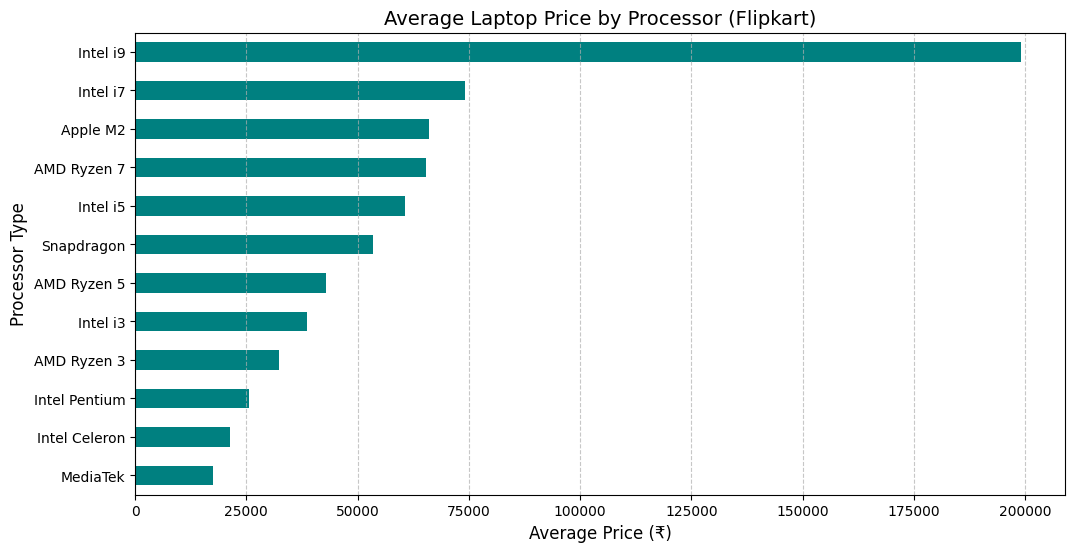

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Save your hard work!
df.to_csv('flipkart_laptops_CLEAN.csv', index=False)
print("✅ Cleaned data saved to 'flipkart_laptops_CLEAN.csv'")

# 2. Calculate Average Price per Processor
# We group by 'Processor', take the average of 'Price', and sort it.
price_analysis = df.groupby('Processor')['Price'].mean().sort_values()

# 3. Create the Chart
plt.figure(figsize=(12, 6)) # Make the chart big
price_analysis.plot(kind='barh', color='teal') # 'barh' = Horizontal Bar Chart

# 4. Add Labels
plt.title('Average Laptop Price by Processor (Flipkart)', fontsize=14)
plt.xlabel('Average Price (₹)', fontsize=12)
plt.ylabel('Processor Type', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7) # Add faint grid lines

# 5. Show it
plt.show()

In [9]:
# 1. Define our criteria for a "Steal"
# Condition: Intel i5 OR Ryzen 5
good_cpu = df['Processor'].isin(['Intel i5', 'AMD Ryzen 5'])

# Condition: At least 16GB RAM (No 8GB allowed!)
good_ram = df['RAM_GB'] >= 16

# Condition: Price must be cheap (e.g., under 50k)
good_price = df['Price'] < 50000

# 2. Apply the filter
best_deals = df[good_cpu & good_ram & good_price].sort_values(by='Price')

# 3. Show the Top 5 Deals
print(f"🔥 Found {len(best_deals)} Amazing Deals!")
print("Here are the top 5 cheapest options:")

# We select specific columns so it's easy to read
display_cols = ['Name', 'Price', 'Processor', 'RAM_GB', 'Storage_GB']
print(best_deals[display_cols].head())

🔥 Found 35 Amazing Deals!
Here are the top 5 cheapest options:
                                                  Name  Price    Processor  \
13   Acer Aspire 15 AMD Ryzen 5 Hexa Core 7430U - (...  34490  AMD Ryzen 5   
3    DELL 15 AMD Ryzen 5 Hexa Core 7530U - (16 GB/5...  40990  AMD Ryzen 5   
155  Lenovo IdeaPad Slim 3 AMD Ryzen 5 Quad Core 75...  40990  AMD Ryzen 5   
115  ASUS Vivobook Go 15 (2025) with Office 2024 + ...  40990  AMD Ryzen 5   
19   Acer Aspire 3 Intel Core i5 13th Gen 1334U - (...  40990     Intel i5   

     RAM_GB  Storage_GB  
13       16         512  
3        16         512  
155      16         512  
115      16         512  
19       16         512  


In [10]:
# Save the 35 "Steal" laptops to a CSV file
best_deals.to_csv('flipkart_best_deals.csv', index=False)

print("✅ DONE! The file 'flipkart_best_deals.csv' is saved in your folder.")
print("Project Complete.")

✅ DONE! The file 'flipkart_best_deals.csv' is saved in your folder.
Project Complete.
